In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
data_df = pd.read_excel('Demat_account_dataset.xlsx')

In [ ]:
data_df.columns

Index(['Month', 'DEMAT accounts'], dtype='object')

In [ ]:
data_df.columns = ["Month" , "DEMAT_accounts"]

In [ ]:
data_df['Date'] = pd.to_datetime(data_df['Month'], format='%B-%Y')
start_date = pd.to_datetime('January-2000', format='%B-%Y')
data_df['Elapsed Time (Months)'] = ((data_df['Date'].dt.year - start_date.year) * 12
                                    + data_df['Date'].dt.month - start_date.month)
data_df['MontH_Number'] = data_df['Date'].dt.month
data_df['Year'] = data_df['Date'].dt.year
data_df['Previous_Month_Account'] = data_df['DEMAT_accounts'].shift(-1)

data_df.head()

,Month,DEMAT_accounts,Date,Elapsed Time (Months),MontH_Number,Year,Previous_Month_Account
0,2024-02-01,148.0,2024-02-01,289,2,2024,144.0
1,2024-01-02,144.0,2024-01-02,288,1,2024,139.0
2,2023-12-03,139.0,2023-12-03,287,12,2023,135.0
3,2023-11-03,135.0,2023-11-03,286,11,2023,132.0
4,2023-10-04,132.0,2023-10-04,285,10,2023,130.0


In [ ]:
data_2 = data_df.drop(["Month" , "Date" , "Previous_Month_Account"] , axis = 1)

In [ ]:
data_2.head()

,DEMAT_accounts,Elapsed Time (Months),MontH_Number,Year
0,148.0,289,2,2024
1,144.0,288,1,2024
2,139.0,287,12,2023
3,135.0,286,11,2023
4,132.0,285,10,2023


21BBS0115

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X = data_2[['Elapsed Time (Months)', 'MontH_Number', 'Year']]
y = data_df['DEMAT_accounts']

X = X.dropna()
y = y[X.index]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Predictions on test set:", y_pred)
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Predictions on test set: [134.53125  124.15625   45.4375    74.125    109.5       27.75
  68.625     39.953125 111.34375   56.4375    70.453125  20.421875
 102.8125  ]
Model coefficients: [-3.62727558e+09  3.62727558e+09  4.35273069e+10]
Model intercept: -87058241164588.78


In [ ]:
y_test

,DEMAT_accounts
0,148.00
5,130.00
46,41.00
31,64.00
13,110.00
55,37.64
34,58.00
49,40.16
12,113.00
40,48.00


In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R-squared (model accuracy):", r2)

R-squared (model accuracy): 0.9472341266277556


In [ ]:
input_data = {
    'Elapsed Time (Months)': [300,299,298,297,296,295,294,293],
    'MontH_Number': [1,12,11,10,9,8,7,6],
    'Year': [2025,2024,2024,2024,2024,2024,2024,2024],
}

input_df = pd.DataFrame(input_data)
predicted_demat_accounts = model.predict(input_df)
for i in range(7,-1,-1):
  print("Predicted DEMAT accounts for month " ,  input_data['MontH_Number'][i] ,"2025(in millions):", predicted_demat_accounts[i])

print("\n\nPredicted DEMAT accounts for January 2025(in millions):", predicted_demat_accounts[0])
print("21BBS0115")


Predicted DEMAT accounts for month  6 2025(in millions): 141.859375
Predicted DEMAT accounts for month  7 2025(in millions): 143.6875
Predicted DEMAT accounts for month  8 2025(in millions): 145.515625
Predicted DEMAT accounts for month  9 2025(in millions): 147.34375
Predicted DEMAT accounts for month  10 2025(in millions): 149.171875
Predicted DEMAT accounts for month  11 2025(in millions): 151.015625
Predicted DEMAT accounts for month  12 2025(in millions): 152.84375
Predicted DEMAT accounts for month  1 2025(in millions): 155.875


Predicted DEMAT accounts for January 2025(in millions): 155.875
21BBS0115


In [ ]:
result = data_df

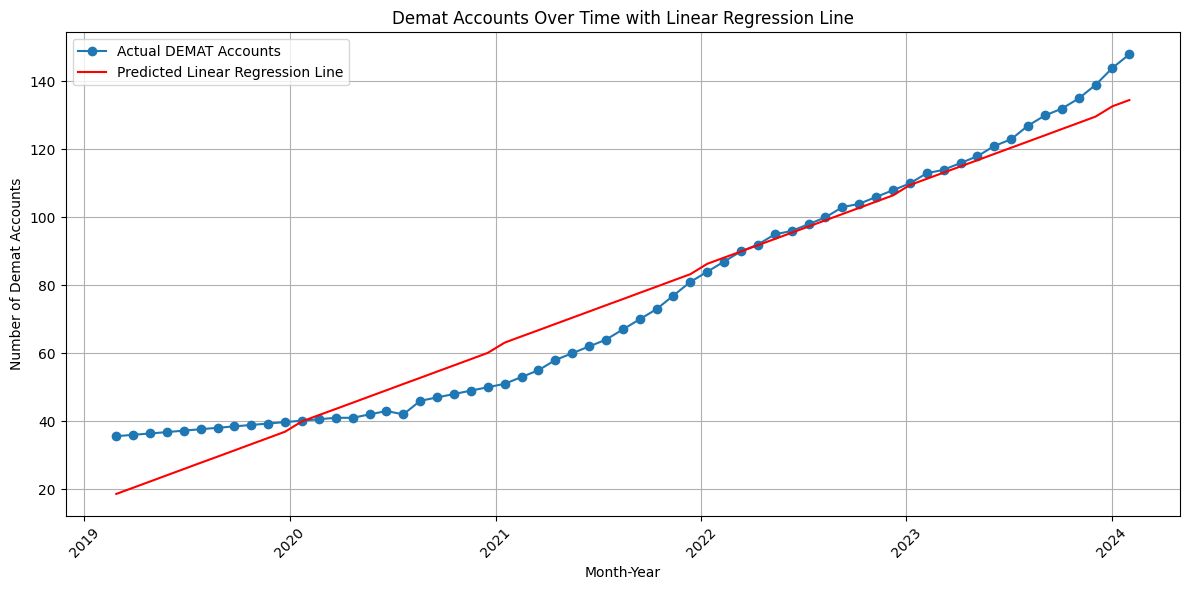

In [ ]:
X = data_df[['Elapsed Time (Months)', 'MontH_Number', 'Year']]
predicted_accounts = (
    model.intercept_ +
    model.coef_[0] * X['Elapsed Time (Months)'] +
    model.coef_[1] * X['MontH_Number'] +
    model.coef_[2] * X['Year']
)

plt.figure(figsize=(12, 6))
plt.plot(data_df['Date'], data_df['DEMAT_accounts'], marker='o', label='Actual DEMAT Accounts')
plt.plot(data_df['Date'], predicted_accounts, color='red', label='Predicted Linear Regression Line')
plt.title('Demat Accounts Over Time with Linear Regression Line')
plt.xlabel('Month-Year')
plt.ylabel('Number of Demat Accounts')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
